In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import time
import math
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['titanic']


In [2]:
train = pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()
train.PassengerId.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


False

In [5]:
test.info()
test.PassengerId.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


False

In [6]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
#fill missing values with average
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


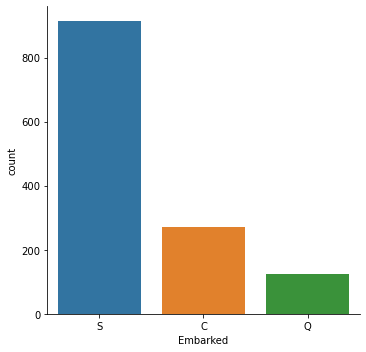

In [8]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

In [9]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [10]:
#dividing men, women, children
all.loc[:,'who'] = 'M'
#1 for child, 2 for woman, 3 for man
all.loc[ all['Age'] <= 16, 'who'] = 'C'
all.loc[ (all['Age'] > 16) & (all['Sex'] == 'female'), 'who'] = 'W'
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,W
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,W
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,W
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


# Plotting Survival By Men, Women, and Children

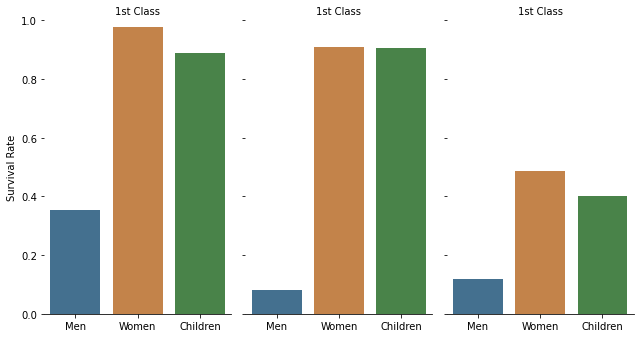

In [11]:
g = sns.catplot(x='who', y='Survived', col='Pclass',
                data=all, saturation=.5,
                kind='bar', ci=None, aspect=.6)
(g.set_axis_labels('', 'Survival Rate')
  .set_xticklabels(['Men', 'Women', 'Children'])
  .set_titles('1st Class', '2nd Class', '3rd Class')
  .set(ylim=(0, 1))
  .despine(left=True))  

In [12]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [13]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Jonkheer.      1
Countess.      1
Capt.          1
Mme.           1
Dona.          1
Lady.          1
Sir.           1
Don.           1
Name: Title, dtype: int64

In [14]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()


Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [15]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [16]:
#Family Size Column
all['Family Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,Title,Family Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,W,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,W,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,W,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M,Mr.,1,1


In [17]:
#Drop Name and ticket columns
all = all.drop(['Name', 'Ticket'], axis = 1)
all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,who,Title,Family Size,IsAlone
0,1,0.0,3,male,22.0,1,0,7.2500,M,S,M,Mr.,2,0
1,2,1.0,1,female,38.0,1,0,71.2833,C,C,W,Mrs.,2,0
2,3,1.0,3,female,26.0,0,0,7.9250,M,S,W,Miss.,1,1
3,4,1.0,1,female,35.0,1,0,53.1000,C,S,W,Mrs.,2,0
4,5,0.0,3,male,35.0,0,0,8.0500,M,S,M,Mr.,1,1


In [18]:
#create dummy variables
all = pd.get_dummies(all, drop_first = True)
for col in all.columns: 
    print(col) 

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare
Family Size
IsAlone
Sex_male
Cabin_B
Cabin_C
Cabin_D
Cabin_E
Cabin_F
Cabin_G
Cabin_M
Cabin_T
Embarked_Q
Embarked_S
who_M
who_W
Title_Master.
Title_Miss.
Title_Mr.
Title_Mrs.
Title_Officer.
Title_Royal.


In [19]:
all.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,IsAlone,Sex_male,...,Embarked_Q,Embarked_S,who_M,who_W,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,22.0,1,0,7.2500,2,0,1,...,0,1,1,0,0,0,1,0,0,0
1,2,1.0,1,38.0,1,0,71.2833,2,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,1.0,3,26.0,0,0,7.9250,1,1,0,...,0,1,0,1,0,1,0,0,0,0
3,4,1.0,1,35.0,1,0,53.1000,2,0,0,...,0,1,0,1,0,0,0,1,0,0
4,5,0.0,3,35.0,0,0,8.0500,1,1,1,...,0,1,1,0,0,0,1,0,0,0


In [20]:
#train data from all
all_train = all[all['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [21]:
#test data from all
all_test = all[all['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_male        418 non-null    uint8  
 10  Cabin_B         418 non-null    uint8  
 11  Cabin_C         418 non-null    uint8  
 12  Cabin_D         418 non-null    uint8  
 13  Cabin_E         418 non-null    uint8  
 14  Cabin_F         418 non-null    uint8  
 15  Cabin_G         418 non-null    uint8  
 16  Cabin_M         418 non-null    uint8  
 17  Cabin_T         418 non-null    uin

# Machine Learning Model

In [22]:
#train and test split
from sklearn.model_selection import train_test_split
X = all_train.drop(['PassengerId', 'Survived'], axis = 1)
y = all_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [23]:
#applying standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [25]:
#check model performance
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       128
         1.0       0.80      0.63      0.71        95

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.77       223

[[113  15]
 [ 35  60]]


In [26]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
print(cm)

0.7757847533632287


In [27]:
#determining best n estimators
best_n = 0
best_cm = 0
#for n_est in range(100, 500):
#    rfc = RandomForestClassifier(n_estimators = n_est)
#    rfc.fit(X_train, y_train)
#    pred_rfc = rfc.predict(X_test)
#    cm = accuracy_score(y_test, pred_rfc)
#    if(cm > best_cm):
#        best_cm = cm
#        best_n = n_est
best_n = 255
accuracy = 0.789
print('best n = ', best_n)
print('accuracy = ', best_cm)

best n =  255
accuracy =  0


SVM Classifier

In [28]:
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [29]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       128
         1.0       0.83      0.72      0.77        95

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223

[[114  14]
 [ 27  68]]


In [30]:
print(accuracy_score(y_test, pred_clf))

0.8161434977578476


Neural Network

In [31]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes = (2, 4), max_iter = 700)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [32]:
#check model performance
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       128
         1.0       0.82      0.66      0.73        95

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.79      0.79       223

[[114  14]
 [ 32  63]]


In [33]:
print(accuracy_score(y_test, pred_mlpc))

0.7937219730941704


In [34]:
#determining best layer sizes
best_i = 0
best_j = 0
best_acc = 0
#for i in range(1, 20):
#    for j in range(1, 20):
#        mlpc = MLPClassifier(hidden_layer_sizes = (i,j), max_iter = 700)
#        mlpc.fit(X_train, y_train)
#        pred_mlpc = mlpc.predict(X_test)
#        acc = accuracy_score(y_test, pred_mlpc)
#        if(acc > best_acc):
#            best_acc = acc
#            best_i = i
#            best_j = j
best_i = 2
best_j = 4
best_acc = 0.8206
print(best_i, best_j, best_acc)

2 4 0.8206


Logistic Model

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train,y_train)
pred_logmodel = logmodel.predict(X_test)

In [36]:
print(classification_report(y_test,pred_logmodel))
print(confusion_matrix(y_test,pred_logmodel))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       128
         1.0       0.83      0.72      0.77        95

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223

[[114  14]
 [ 27  68]]


In [37]:
print(accuracy_score(y_test, pred_logmodel))

0.8161434977578476


# Final Predictions

In [38]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)
TestForPred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Family Size     418 non-null    int64  
 6   IsAlone         418 non-null    int64  
 7   Sex_male        418 non-null    uint8  
 8   Cabin_B         418 non-null    uint8  
 9   Cabin_C         418 non-null    uint8  
 10  Cabin_D         418 non-null    uint8  
 11  Cabin_E         418 non-null    uint8  
 12  Cabin_F         418 non-null    uint8  
 13  Cabin_G         418 non-null    uint8  
 14  Cabin_M         418 non-null    uint8  
 15  Cabin_T         418 non-null    uint8  
 16  Embarked_Q      418 non-null    uint8  
 17  Embarked_S      418 non-null    uin

In [39]:
t_pred = logmodel.predict(TestForPred).astype(int)
PassengerId = all_test['PassengerId']
logSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
logSub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [40]:
logSub.to_csv('/kaggle/workingLogistic_Regression_Submission.csv', index = False)